#### Влияние повторения учебных материалов на результаты тестирования

Структура данных:

·         View_stat – статистика чтения учебных материалов

o   stat_id – идентификатор записи

o   ebs_user_id – идентификатор пользователя

o   content_id – идентификатор учебного материала

o   start_date – дата и время начала чтения

o   finish_date – дата и время окончания чтения

·         Quiz_stat – статистика прохождение тестов

o   quiz_user_id – идентификатор прохождения

o   ebs_user_id – идентификатор пользователя

o   content_id – идентификатор учебного материала, к которому привязан тест

o   quiz_id – идентификатор теста

o   score – кол-во набранных баллов за тест

o   total_score – максимально возможное кол-во баллов в тесте

o   create_at – дата и время начала прохождения теста

o   finish_at – дата и время завершения теста

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
view = pd.read_csv('view_stat.csv', sep = ';', header = None)

In [3]:
quiz = pd.read_csv('quiz_stat.csv', sep = '\t')

In [4]:
view.columns = ['stat_id', 'ebs_user_id', 'content_id', 'start_date', 'finish_date']

Преобразуем строковые величины в даты:

In [5]:
view.start_date = pd.to_datetime(view.start_date)
view.finish_date = pd.to_datetime(view.finish_date)
quiz.create_at = pd.to_datetime(quiz.create_at)
quiz.finish_at = pd.to_datetime(quiz.finish_at)

In [6]:
view.head()

,stat_id,ebs_user_id,content_id,start_date,finish_date
0,70719195,2FADB1B5-9D51-44B2-B7D0-E2F77AA54F48,E185B2BD-29CE-40A6-B09D-00BF93711CF2,2020-05-01 13:56:27,2020-05-01 14:26:25
1,70747054,513E6728-F87D-4293-9A28-6F0F006FC8B0,E185B2BD-29CE-40A6-B09D-00BF93711CF2,2020-05-01 15:43:58,2020-05-01 16:03:37
2,70913809,9ABEFF2C-31F5-410D-93B2-C73AA9578E05,E185B2BD-29CE-40A6-B09D-00BF93711CF2,2020-05-02 10:09:05,2020-05-02 10:23:36
3,70958583,9ABEFF2C-31F5-410D-93B2-C73AA9578E05,E185B2BD-29CE-40A6-B09D-00BF93711CF2,2020-05-02 13:25:07,2020-05-02 13:34:37
4,70969815,9ABEFF2C-31F5-410D-93B2-C73AA9578E05,E185B2BD-29CE-40A6-B09D-00BF93711CF2,2020-05-02 14:05:19,2020-05-02 14:14:38


In [7]:
view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14139035 entries, 0 to 14139034
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   stat_id      int64         
 1   ebs_user_id  object        
 2   content_id   object        
 3   start_date   datetime64[ns]
 4   finish_date  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 539.4+ MB


In [8]:
quiz.head()

,quiz_user_id,ebs_user_id,content_id,quiz_id,score,total_score,create_at,finish_at
0,85448,DAE1D1A4-294E-4B66-8C8C-5BD0E7B88C5C,8396304F-DFC9-4DB9-9200-02F5911078EA,11F7E721-67E8-4708-9207-3D9683481E93,20.0,22,2020-04-01 00:22:21,2020-04-01 00:30:42
1,85448,DAE1D1A4-294E-4B66-8C8C-5BD0E7B88C5C,DAAAF6F5-3769-47B6-91B1-02119C087D6C,11F7E721-67E8-4708-9207-3D9683481E93,20.0,22,2020-04-01 00:22:21,2020-04-01 00:30:42
2,85449,2EE248CF-E355-49F7-9ADC-12E2E1CCF3F6,5E6AB4AB-2760-4B30-A0C1-FBA265AB4AB3,BFB506DA-1555-410F-8F2C-F6155B496036,2.0,10,2020-04-01 00:37:00,2020-04-01 15:34:34
3,85449,2EE248CF-E355-49F7-9ADC-12E2E1CCF3F6,EA8D12B5-FB78-4B35-8F7F-17C6AA371981,BFB506DA-1555-410F-8F2C-F6155B496036,2.0,10,2020-04-01 00:37:00,2020-04-01 15:34:34
4,85449,2EE248CF-E355-49F7-9ADC-12E2E1CCF3F6,A3C775E3-39A1-455E-8036-5015DC15E0D1,BFB506DA-1555-410F-8F2C-F6155B496036,2.0,10,2020-04-01 00:37:00,2020-04-01 15:34:34


In [9]:
quiz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276192 entries, 0 to 1276191
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   quiz_user_id  1276192 non-null  int64         
 1   ebs_user_id   1276192 non-null  object        
 2   content_id    1276192 non-null  object        
 3   quiz_id       1276192 non-null  object        
 4   score         1104981 non-null  float64       
 5   total_score   1276192 non-null  int64         
 6   create_at     1276192 non-null  datetime64[ns]
 7   finish_at     1104981 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 77.9+ MB


В таблице 'view' присутствуют ошибочные данные, в которых дата и время окончания чтения является более ранней, чем дата и время начала чтения:

In [10]:
view[view.finish_date < view.start_date]

,stat_id,ebs_user_id,content_id,start_date,finish_date
37,75570959,561E6530-AE24-4CB9-8D1E-25124AF5336C,E185B2BD-29CE-40A6-B09D-00BF93711CF2,2020-05-13 18:52:30,2020-05-13 18:52:13
55,77605668,7F2D6208-8C0D-4AEB-9F1A-9CFEEC539FEA,E185B2BD-29CE-40A6-B09D-00BF93711CF2,2020-05-18 07:59:18,2020-05-18 07:57:53
114,72416995,9AF3D788-837F-457F-BE80-E168D96DB67F,E185B2BD-29CE-40A6-B09D-00BF93711CF2,2020-05-06 18:16:15,2020-05-06 18:15:10
181,83109127,FA58A49B-0414-4AAE-B0B2-829616A11726,E185B2BD-29CE-40A6-B09D-00BF93711CF2,2020-05-27 23:55:33,2020-05-27 23:54:11
337,75710391,7F2D6208-8C0D-4AEB-9F1A-9CFEEC539FEA,E185B2BD-29CE-40A6-B09D-00BF93711CF2,2020-05-14 11:42:02,2020-05-14 11:39:54
...,...,...,...,...,...
14138321,79896592,4994E3DD-404B-4967-B0B6-03D5E2FECB02,5DC4D7BE-1207-4CEC-98FA-E81AACCE90FD,2020-05-21 22:03:28,2020-05-21 22:03:18
14138480,79769636,7BF34BDD-6B2F-47D3-BAEA-84C307ADBE4C,5DC4D7BE-1207-4CEC-98FA-E81AACCE90FD,2020-05-21 18:10:20,2020-05-21 18:08:25
14138579,79945080,9ABEFF2C-31F5-410D-93B2-C73AA9578E05,5DC4D7BE-1207-4CEC-98FA-E81AACCE90FD,2020-05-21 23:57:15,2020-05-21 23:55:46
14138602,80372452,4E438CA0-DAF1-4111-9BE3-3E53D5442E4B,5DC4D7BE-1207-4CEC-98FA-E81AACCE90FD,2020-05-22 19:13:34,2020-05-22 19:11:03


Избавимся от этих ошибочных данных:

In [11]:
view = view.drop(view[view.finish_date < view.start_date].index)

In [12]:
view.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14024112 entries, 0 to 14139034
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   stat_id      int64         
 1   ebs_user_id  object        
 2   content_id   object        
 3   start_date   datetime64[ns]
 4   finish_date  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 642.0+ MB


В таблице 'quiz' также присутствуют ошибочные данные, в которых дата и время окончания теста является более ранней, чем дата и время начала теста:

In [13]:
quiz[quiz.finish_at < quiz.create_at]

,quiz_user_id,ebs_user_id,content_id,quiz_id,score,total_score,create_at,finish_at
35685,90677,4F9F7EFE-F827-403A-B418-329FF1F49881,2750497E-F894-4BEF-839A-18EBC2C32255,0E75614C-F90A-42B4-9737-DABF7F433545,1.0,1,2020-04-06 12:41:10,2020-04-06 12:41:08
35686,90677,4F9F7EFE-F827-403A-B418-329FF1F49881,2F504A69-85BE-4D26-AC1D-E31B2BEA8956,0E75614C-F90A-42B4-9737-DABF7F433545,1.0,1,2020-04-06 12:41:10,2020-04-06 12:41:08
35687,90677,4F9F7EFE-F827-403A-B418-329FF1F49881,88712D63-7F11-4656-AC46-0382875E34CB,0E75614C-F90A-42B4-9737-DABF7F433545,1.0,1,2020-04-06 12:41:10,2020-04-06 12:41:08
35688,90677,4F9F7EFE-F827-403A-B418-329FF1F49881,0C8811A1-5AB8-4205-9C3C-88A5C418EDD4,0E75614C-F90A-42B4-9737-DABF7F433545,1.0,1,2020-04-06 12:41:10,2020-04-06 12:41:08
35689,90677,4F9F7EFE-F827-403A-B418-329FF1F49881,2BF05991-384D-478F-95C2-B545E3C50A48,0E75614C-F90A-42B4-9737-DABF7F433545,1.0,1,2020-04-06 12:41:10,2020-04-06 12:41:08
...,...,...,...,...,...,...,...,...
1276016,261052,5810BB8B-0D07-48CD-865B-5E0857C62093,5A17C2F6-D817-42E5-A4D5-94EEC35A846F,042C5413-BD0B-45DE-B1CB-4F8EBA4B9C01,0.0,1,2020-05-31 23:32:53,2020-05-31 23:32:30
1276017,261052,5810BB8B-0D07-48CD-865B-5E0857C62093,A90761FB-4C90-4AE1-8369-FC4112000AA4,042C5413-BD0B-45DE-B1CB-4F8EBA4B9C01,0.0,1,2020-05-31 23:32:53,2020-05-31 23:32:30
1276018,261052,5810BB8B-0D07-48CD-865B-5E0857C62093,E9956EC4-16E5-4CC8-A3CA-1FEF6078225A,042C5413-BD0B-45DE-B1CB-4F8EBA4B9C01,0.0,1,2020-05-31 23:32:53,2020-05-31 23:32:30
1276093,261063,4B67A7FA-432B-4BB7-9C8C-4288E35D3364,3F261A7B-E69A-4A86-BB17-1BAEF0D422FC,60B5DFC7-06B7-47E1-8D7A-3D71B4DF7DB5,6.0,9,2020-05-31 23:43:10,2020-05-31 23:41:59


Также избавляемся от ошибочных данных:

In [14]:
quiz = quiz.drop(quiz[quiz.finish_at < quiz.create_at].index)

Добавим в таблицу view столбец time - продолжительность изучения учебного материала:

In [15]:
view['time'] = view.finish_date - view.start_date

В таблицу quiz добавим столбец со значениями относительного балла за тест:

In [16]:
quiz['rel_score'] = quiz.score / quiz.total_score

Удаляем ошибочные данные, в которых относительный балл выше 1:

In [17]:
quiz = quiz.drop(quiz[quiz['rel_score'] > 1].index)

Для каждой уникальной комбинации "пользователь - учебный_материал" добавляем столбец с самым поздним временем окончания последнего экзамена:

In [18]:
quiz['max_finish'] = quiz.groupby(['ebs_user_id', 'content_id'])['finish_at'].transform('max')

In [19]:
quiz.head()

,quiz_user_id,ebs_user_id,content_id,quiz_id,score,total_score,create_at,finish_at,rel_score,max_finish
0,85448,DAE1D1A4-294E-4B66-8C8C-5BD0E7B88C5C,8396304F-DFC9-4DB9-9200-02F5911078EA,11F7E721-67E8-4708-9207-3D9683481E93,20.0,22,2020-04-01 00:22:21,2020-04-01 00:30:42,0.909091,2020-04-01 00:30:42
1,85448,DAE1D1A4-294E-4B66-8C8C-5BD0E7B88C5C,DAAAF6F5-3769-47B6-91B1-02119C087D6C,11F7E721-67E8-4708-9207-3D9683481E93,20.0,22,2020-04-01 00:22:21,2020-04-01 00:30:42,0.909091,2020-04-01 00:30:42
2,85449,2EE248CF-E355-49F7-9ADC-12E2E1CCF3F6,5E6AB4AB-2760-4B30-A0C1-FBA265AB4AB3,BFB506DA-1555-410F-8F2C-F6155B496036,2.0,10,2020-04-01 00:37:00,2020-04-01 15:34:34,0.200000,2020-04-01 15:34:34
3,85449,2EE248CF-E355-49F7-9ADC-12E2E1CCF3F6,EA8D12B5-FB78-4B35-8F7F-17C6AA371981,BFB506DA-1555-410F-8F2C-F6155B496036,2.0,10,2020-04-01 00:37:00,2020-04-01 15:34:34,0.200000,2020-04-01 15:34:34
4,85449,2EE248CF-E355-49F7-9ADC-12E2E1CCF3F6,A3C775E3-39A1-455E-8036-5015DC15E0D1,BFB506DA-1555-410F-8F2C-F6155B496036,2.0,10,2020-04-01 00:37:00,2020-04-01 15:34:34,0.200000,2020-04-01 15:34:34


Соединяем таблицы 'view' и 'quiz' по принципу равенства значений в столбцах 'ebs_user_id', 'content_id':

In [20]:
df_1 = view.merge(quiz, on = ['ebs_user_id', 'content_id'], how = 'inner')

Удаляем строки с пропусками в данных:

In [21]:
df_1 = df_1.dropna()

In [22]:
df_1.head()

,stat_id,ebs_user_id,content_id,start_date,finish_date,time,quiz_user_id,quiz_id,score,total_score,create_at,finish_at,rel_score,max_finish
0,75106770,1BF42858-F33A-442C-8994-B7AE9FA10F9C,F0B50783-A9CB-4989-A681-00C768C5E147,2020-05-12 17:21:06,2020-05-12 17:28:22,00:07:16,152880,7B8CC093-09C9-4E76-AC95-B6595B598FEE,6.0,7,2020-04-25 11:41:04,2020-04-25 11:44:52,0.857143,2020-04-25 11:46:59
1,75106770,1BF42858-F33A-442C-8994-B7AE9FA10F9C,F0B50783-A9CB-4989-A681-00C768C5E147,2020-05-12 17:21:06,2020-05-12 17:28:22,00:07:16,152910,7B8CC093-09C9-4E76-AC95-B6595B598FEE,6.0,7,2020-04-25 11:45:30,2020-04-25 11:46:59,0.857143,2020-04-25 11:46:59
3,78703574,1BF42858-F33A-442C-8994-B7AE9FA10F9C,F0B50783-A9CB-4989-A681-00C768C5E147,2020-05-19 22:32:51,2020-05-19 22:39:02,00:06:11,152880,7B8CC093-09C9-4E76-AC95-B6595B598FEE,6.0,7,2020-04-25 11:41:04,2020-04-25 11:44:52,0.857143,2020-04-25 11:46:59
4,78703574,1BF42858-F33A-442C-8994-B7AE9FA10F9C,F0B50783-A9CB-4989-A681-00C768C5E147,2020-05-19 22:32:51,2020-05-19 22:39:02,00:06:11,152910,7B8CC093-09C9-4E76-AC95-B6595B598FEE,6.0,7,2020-04-25 11:45:30,2020-04-25 11:46:59,0.857143,2020-04-25 11:46:59
6,76099224,1BF42858-F33A-442C-8994-B7AE9FA10F9C,F0B50783-A9CB-4989-A681-00C768C5E147,2020-05-15 01:47:51,2020-05-15 01:51:02,00:03:11,152880,7B8CC093-09C9-4E76-AC95-B6595B598FEE,6.0,7,2020-04-25 11:41:04,2020-04-25 11:44:52,0.857143,2020-04-25 11:46:59


In [23]:
df_1.shape

(2554167, 14)

Удаляем строки с данными, в которых для уникального сочетания "пользователь - учебный материал" дата и время начала изучения материала является более поздней, чем дата окончания последнего теста по этому учебному материалу. Продложительность изучения материала после последнего теста по нему не влияет на текущий результат. 

In [24]:
df_1 = df_1.drop(df_1[df_1.start_date <= df_1.max_finish].index)

In [25]:
df_1.shape

(880282, 14)

Выделяем из полученной таблицы данные по изучению учебных материалов, удаляем дубликаты строк и вычисляем для каждой уникальной пары "пользователь-учебный материал" общее потраченное на изучение материала время:

In [26]:
df_2 = df_1[['stat_id', 'ebs_user_id', 'content_id', 'start_date', 'finish_date',
       'time']].drop_duplicates()

In [27]:
sum_time = df_2.groupby(['ebs_user_id', 'content_id'], as_index=False).time.sum()

In [28]:
sum_time.rename(columns={'time': 'total_time'}, inplace=True)

In [29]:
sum_time.head()

,ebs_user_id,content_id,total_time
0,0004B617-2202-4176-A92C-8419AFD35D8F,3A8F9828-C9C3-4FDF-A5E0-57BC721E3FC2,02:58:56
1,0004B617-2202-4176-A92C-8419AFD35D8F,D4BCB71D-E3A9-47DE-BE5E-5E6DA7C53A1C,02:21:15
2,000C16EC-1F9C-4C99-970A-28866BCBE40C,0E5A6AFC-9616-4454-967D-AF99FB35DA14,01:47:36
3,000E7F89-5642-4B91-AB6E-605C1EC526D7,88C833F0-D557-4279-8E15-38E68FF40D1C,00:12:37
4,000E7F89-5642-4B91-AB6E-605C1EC526D7,D723D76E-E48A-426D-898C-EADE79C89C48,02:31:47


Также выделяем данные по тестированию, удаляем дубликаты строк и вычисляем для каждой уникальной пары "пользователь-учебный материал" максимальное значение относительного оценочного балла:

In [30]:
df_3 = df_1[['ebs_user_id', 'content_id','quiz_user_id', 'quiz_id', 'score', 'total_score', 'create_at',
       'finish_at', 'rel_score']].drop_duplicates()

In [31]:
max_score = df_3.groupby(['ebs_user_id', 'content_id'], as_index=False).rel_score.max()

In [32]:
max_score.rename(columns={'rel_score': 'max_score'}, inplace=True)

In [33]:
max_score.head()

,ebs_user_id,content_id,max_score
0,0004B617-2202-4176-A92C-8419AFD35D8F,3A8F9828-C9C3-4FDF-A5E0-57BC721E3FC2,0.800000
1,0004B617-2202-4176-A92C-8419AFD35D8F,D4BCB71D-E3A9-47DE-BE5E-5E6DA7C53A1C,0.800000
2,000C16EC-1F9C-4C99-970A-28866BCBE40C,0E5A6AFC-9616-4454-967D-AF99FB35DA14,0.642857
3,000E7F89-5642-4B91-AB6E-605C1EC526D7,88C833F0-D557-4279-8E15-38E68FF40D1C,1.000000
4,000E7F89-5642-4B91-AB6E-605C1EC526D7,D723D76E-E48A-426D-898C-EADE79C89C48,0.916667


Соединяем таблицу, отражающую суммарную продолжительность изучения материала, с таблицей, в которой представлен максимальный относительный балл в результате тестирования. Соединение производим по принципу равенства идентификторов пользователя и учебного материала в двух таблицах:

In [34]:
df_total = sum_time.merge(max_score, on = ['ebs_user_id', 'content_id'], how = 'inner')

Для удобства переводим общую продолжительность изучения материала в десятичную дробь. При этом продолжительность отображается в часах. 

In [35]:
df_total.total_time = df_total.total_time.map(lambda x: pd.to_timedelta(x).seconds/3600)

В итоге получаем таблицу, в которой для каждой уникальной пары "пользователь - учебный материал" представлены данные о суммарной продолжительности изучения материала и максимальном относительном балле при тестировании пользователя по этому учебному материалу:

In [36]:
df_total.head()

,ebs_user_id,content_id,total_time,max_score
0,0004B617-2202-4176-A92C-8419AFD35D8F,3A8F9828-C9C3-4FDF-A5E0-57BC721E3FC2,2.982222,0.800000
1,0004B617-2202-4176-A92C-8419AFD35D8F,D4BCB71D-E3A9-47DE-BE5E-5E6DA7C53A1C,2.354167,0.800000
2,000C16EC-1F9C-4C99-970A-28866BCBE40C,0E5A6AFC-9616-4454-967D-AF99FB35DA14,1.793333,0.642857
3,000E7F89-5642-4B91-AB6E-605C1EC526D7,88C833F0-D557-4279-8E15-38E68FF40D1C,0.210278,1.000000
4,000E7F89-5642-4B91-AB6E-605C1EC526D7,D723D76E-E48A-426D-898C-EADE79C89C48,2.529722,0.916667


In [37]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16062 entries, 0 to 16061
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ebs_user_id  16062 non-null  object 
 1   content_id   16062 non-null  object 
 2   total_time   16062 non-null  float64
 3   max_score    16062 non-null  float64
dtypes: float64(2), object(2)
memory usage: 627.4+ KB


При этом наблюдается проблема, состоящая в отсутствии данных о рекомендованной продолжительности изучения каждого учебного материала в соответствии с образовательными стандартами. Идеальной ситуация считалась бы та, при которой наряду с данными об ОТНОСИТЕЛЬНЫХ баллах при тестировании мы располагалии бы данными об ОТНОСИТЕЛЬНОЙ продолжительности изучения каждым пользователем каждого учебного материала. Ввиду отсутствия этих данных представляется целесообразным оценивать влияние продолжительности изучения материала на результаты тестирования по нему для КАЖДОГО УЧЕБНОГО МАТЕРИАЛА ПО ОТДЕЛЬНОСТИ.  

Выведем, к примеру, графики, отображающие зависимость относительного балла от продолжительности изучения материала для первых пяти учебных материалов:

In [38]:
def schedule(n1, n2):
    concat_list = []
    for i in range(n1, n2):
        concat_list.append(df_total[df_total.content_id == df_total.iloc[i].content_id])
    df_viz = pd.concat(concat_list, ignore_index = True)
    return sns.relplot(x = 'total_time', y = 'max_score', hue = 'content_id', height=5, aspect=1.3, data = df_viz)

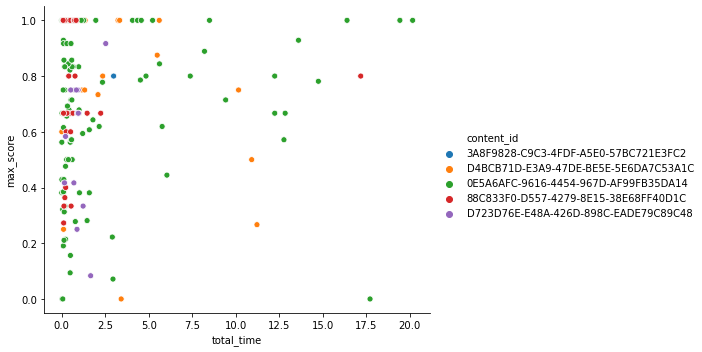

In [39]:
schedule(0, 5)

Посмотрим на следующие 5 учебных дисциплин:

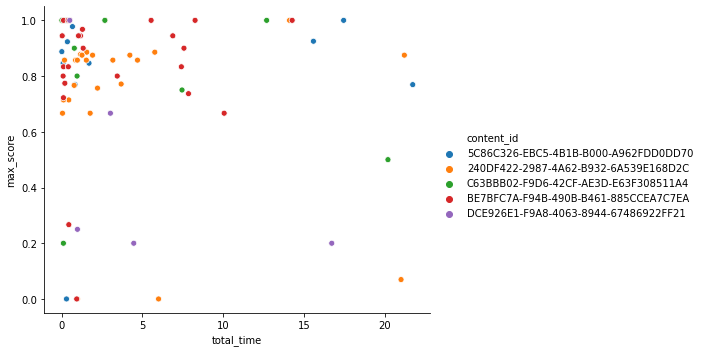

In [40]:
schedule(5, 10)

Картина по следующим пяти учебным материалам:

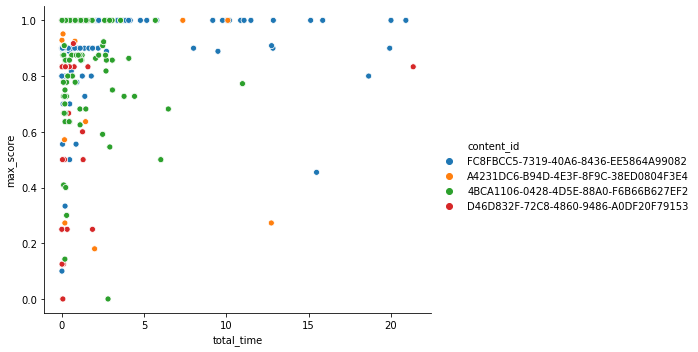

In [41]:
schedule(10, 15)


Из графиков видно, что по крайней мере в случае представленных учебных материалов корреляции между продолжительностью их изучения и результатами тестирования, не наблюдается. Возможно, студенты используют другие источники для подготовки к тестированию.